#### Tutorial for EDA approach (soak some knowledge)

In [3]:
import tensorflow as tf

if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3773811444490279683
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738591438
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10066412098649186448
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:f3:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [5]:
import numpy as np
import pandas as pd

In [6]:
train_data = pd.read_csv(r'C:\data\dec_21\train.csv')
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [7]:
test_data = pd.read_csv(r'C:\data\dec_21\test.csv')

In [8]:
print('{0} number of training entries'.format(len(train_data)))
print('{0} number of test entries'.format(len(test_data)))

4000000 number of training entries
1000000 number of test entries


### 2. EDA

In [9]:
print('The number of categorical target :', len(train_data['Cover_Type'].unique()))

The number of categorical target : 7


Text(0.5, 1.0, 'The relation between Cover_Type and Count')

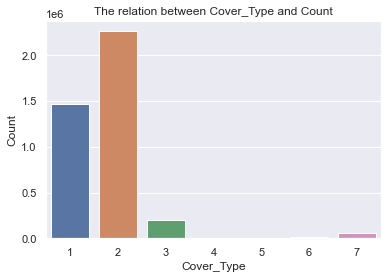

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data['Count'] = 1
train_data_cover_type = train_data.groupby('Cover_Type').sum()
sns.set()
sns.barplot(x = train_data_cover_type.index, y = train_data_cover_type.Count)
plt.title('The relation between Cover_Type and Count')

### 2.2 Elevation features

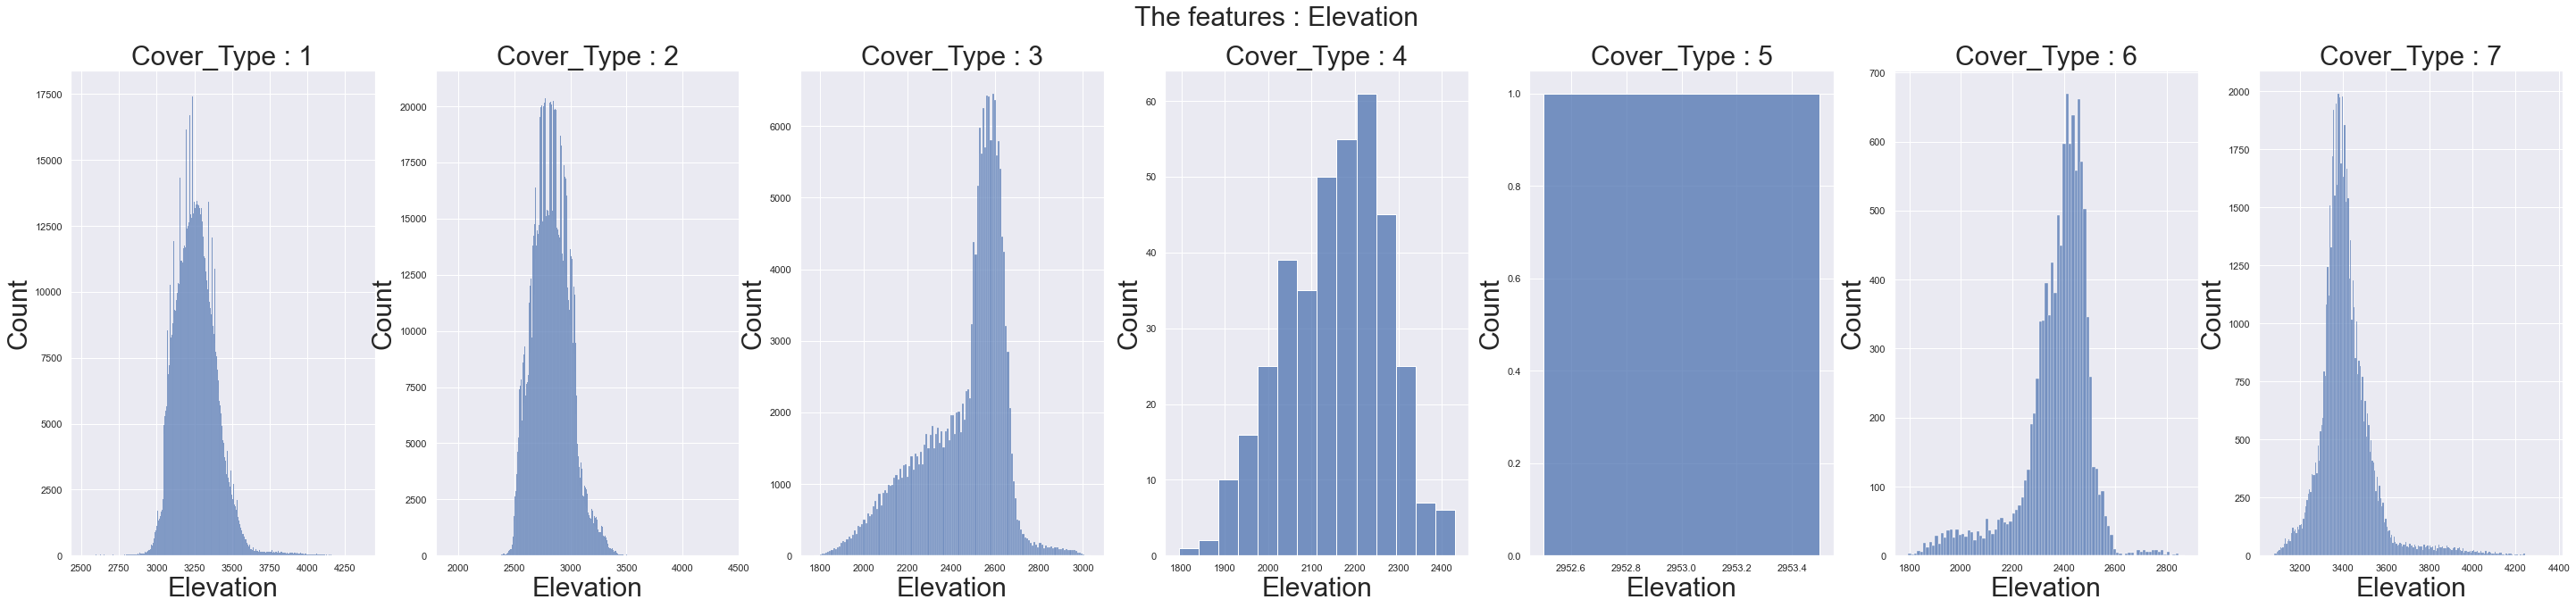

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(50, 10))
fig.suptitle('The features : Elevation', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Elevation, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Elevation', fontsize=30)
    axes[i].set_ylabel('Count', fontsize=30)

### 2.3 Aspect Feature

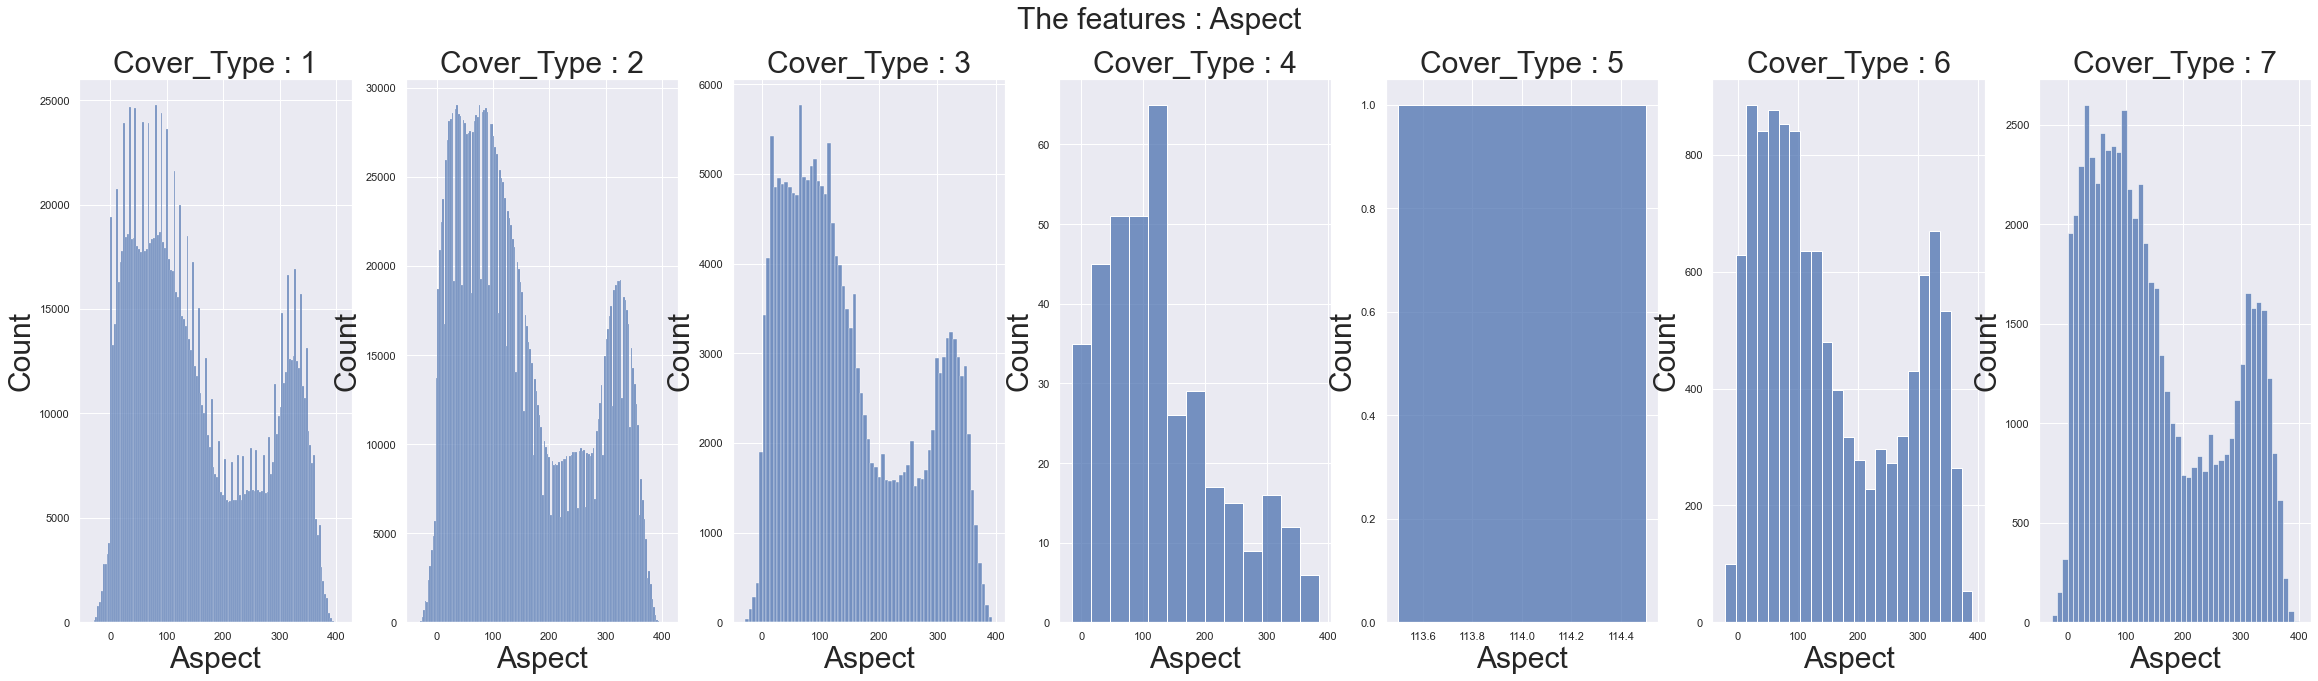

In [12]:
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(40, 10))
fig.suptitle('The features : Aspect', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Aspect, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Aspect', fontsize=30)
    axes[i].set_ylabel('Count', fontsize=30)

### 2.4 Slope Feature

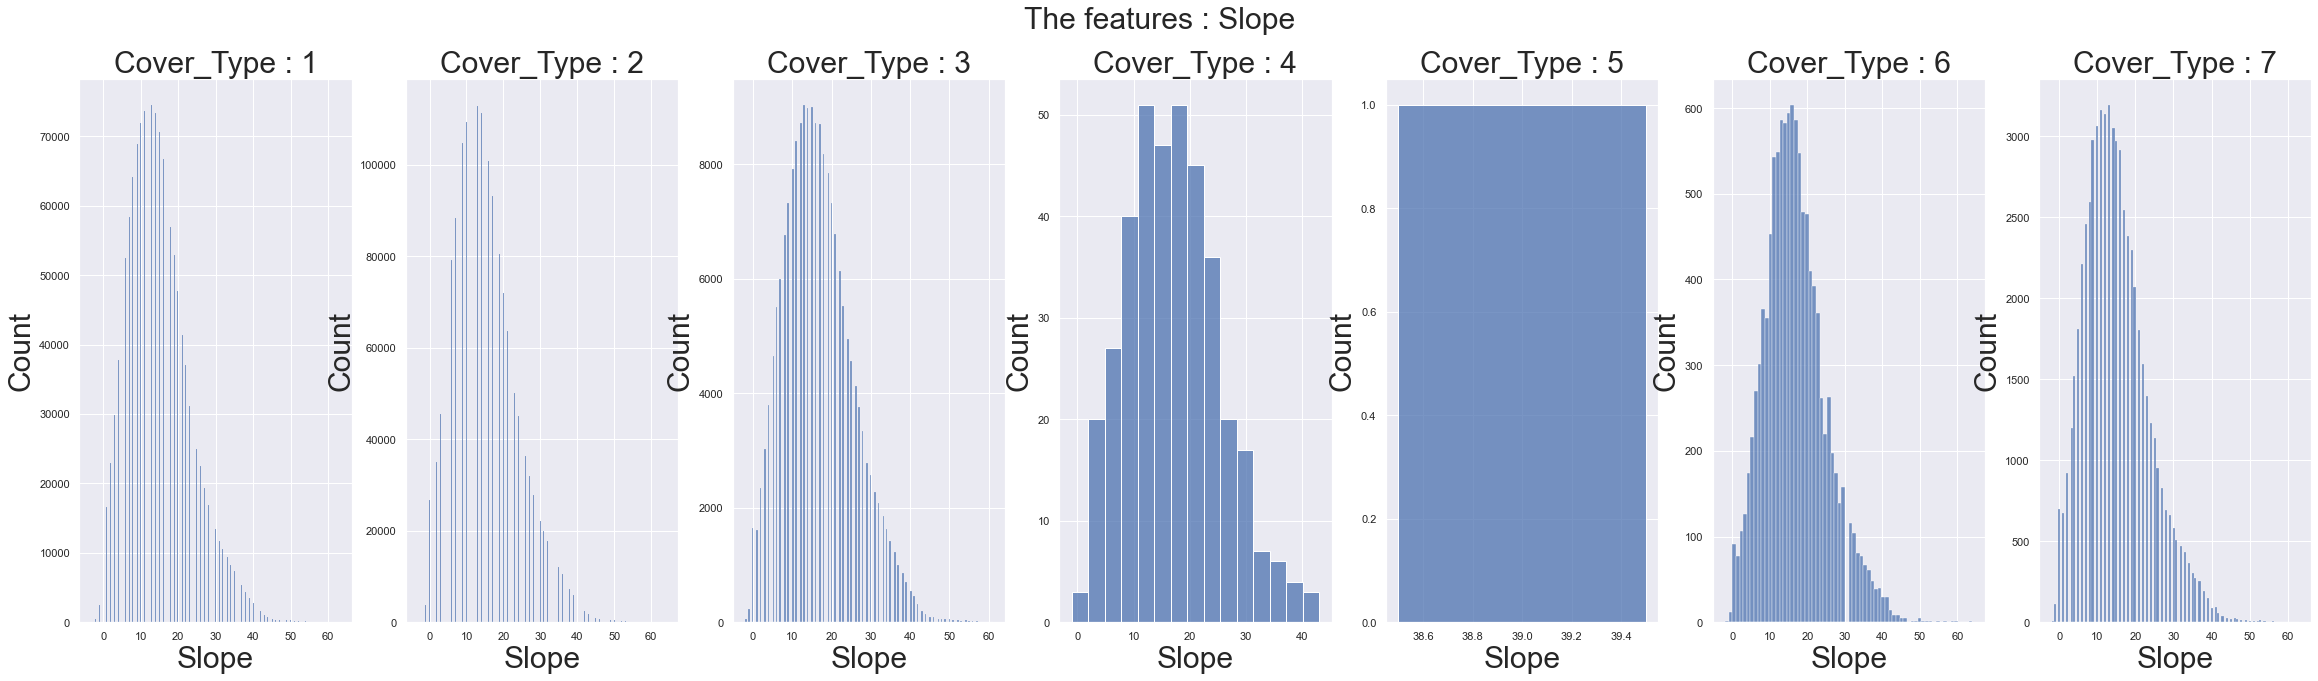

In [13]:
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(40, 10))
fig.suptitle('The features : Slope', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Slope, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Slope', fontsize=30)
    axes[i].set_ylabel('Count', fontsize=30)

### 2.5 Horizontal_Distance_To_Hydrology Feature

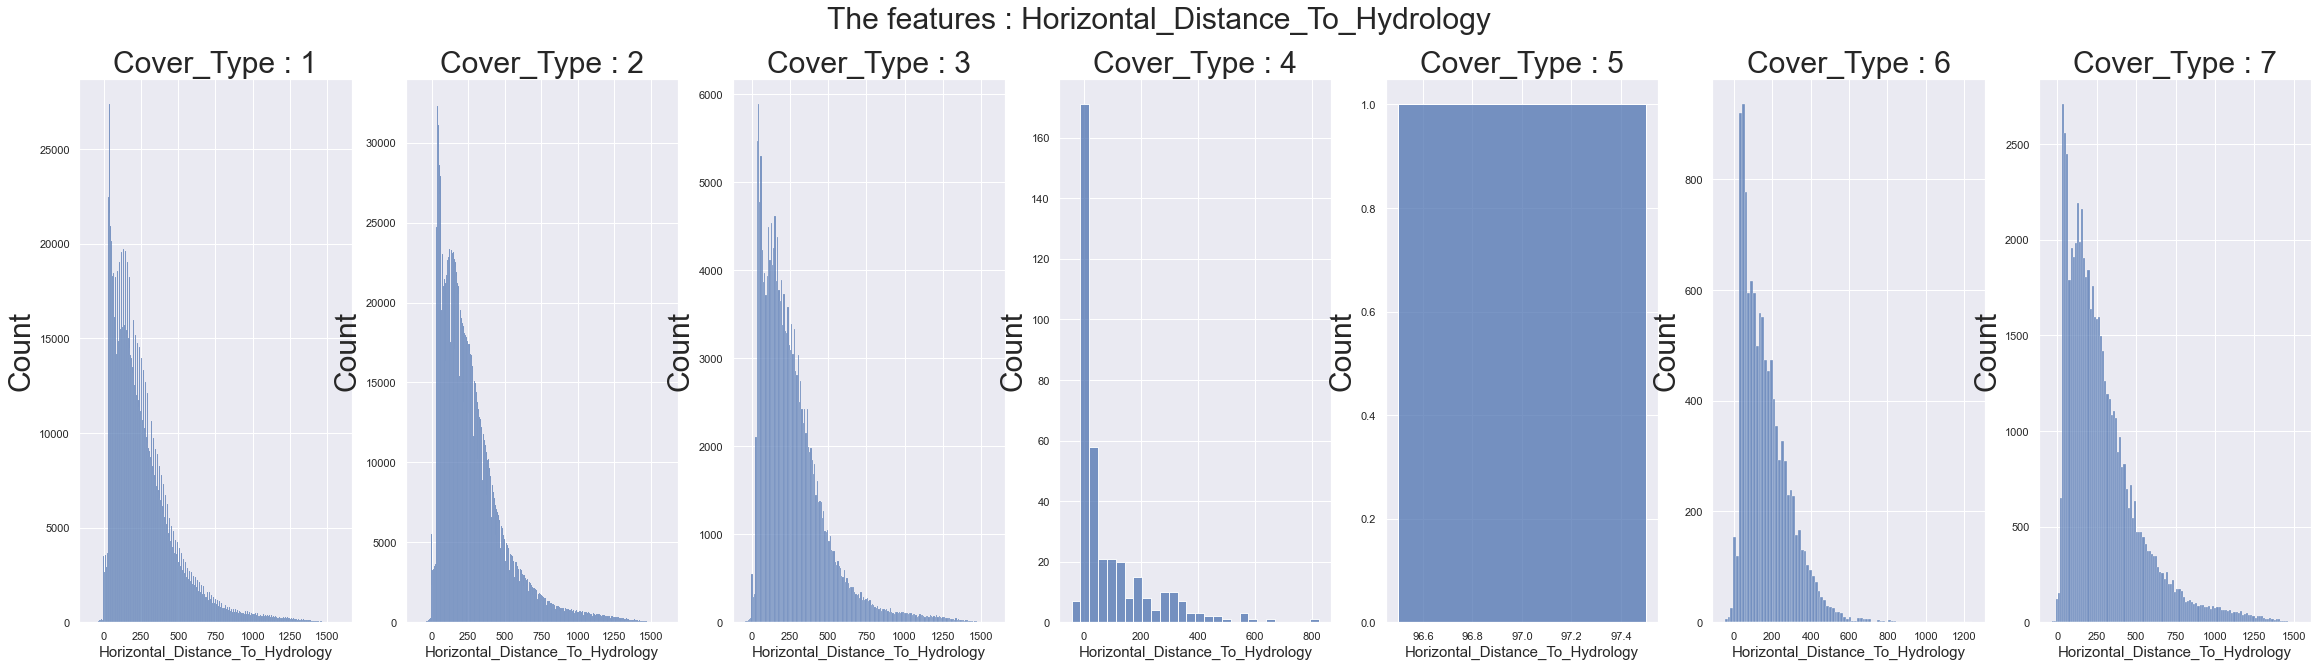

In [14]:
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(40, 10))
fig.suptitle('The features : Horizontal_Distance_To_Hydrology', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Horizontal_Distance_To_Hydrology, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Horizontal_Distance_To_Hydrology', fontsize=15)
    axes[i].set_ylabel('Count', fontsize=30)

### 2.6 Vertical_Distance_To_Hydrology Feature

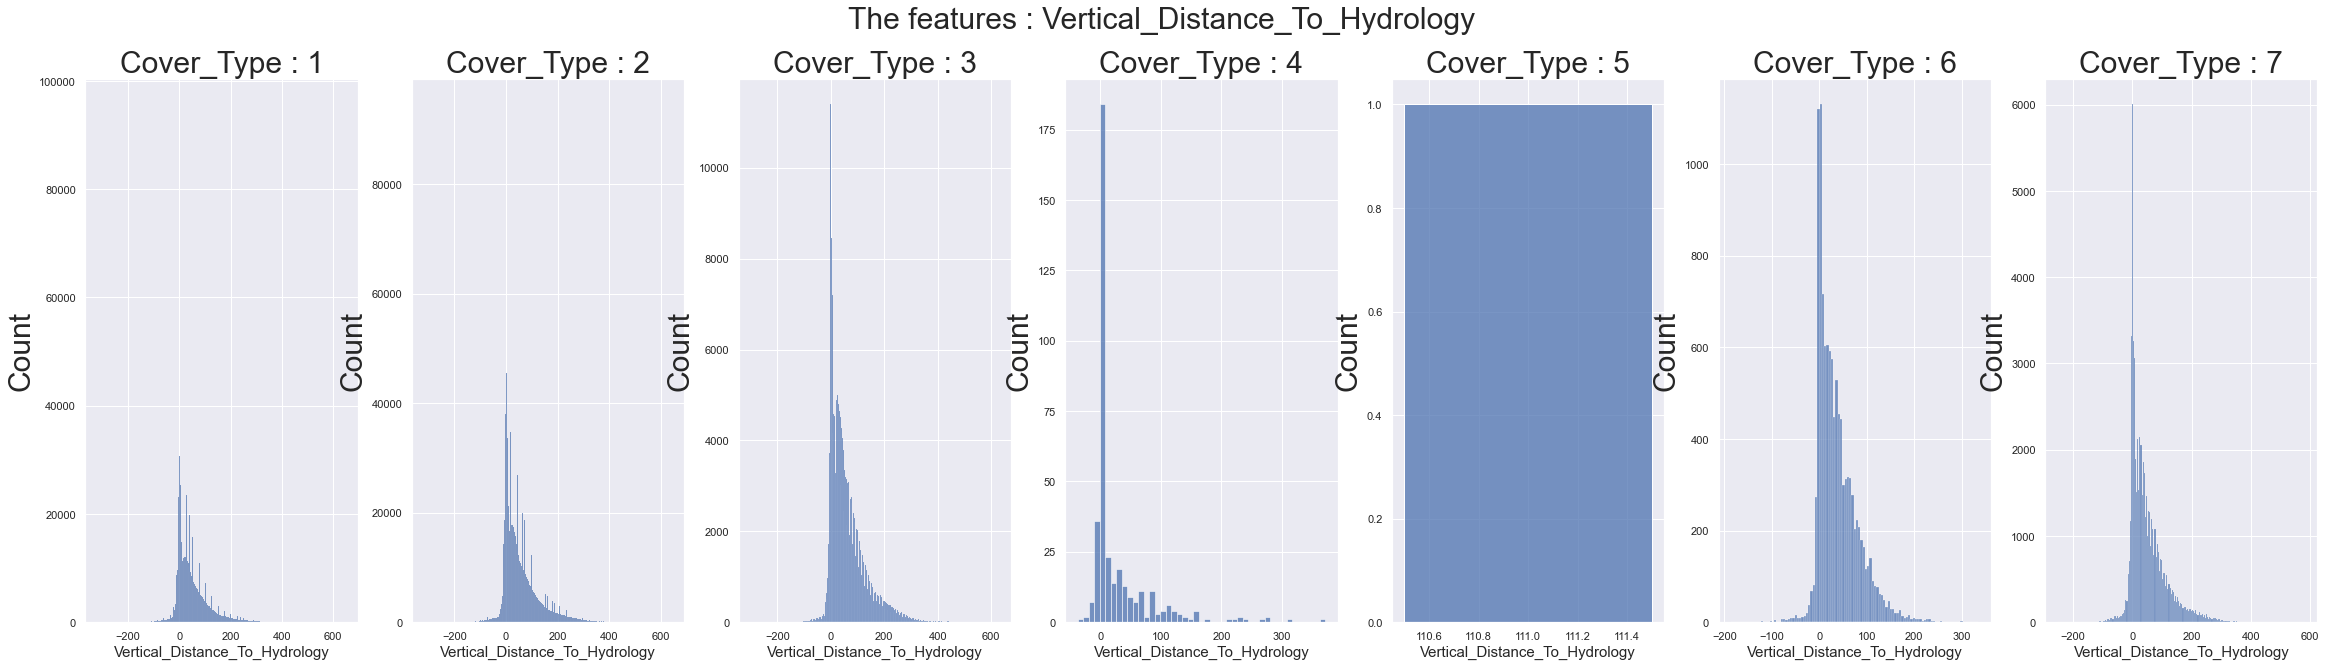

In [15]:
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(40, 10))
fig.suptitle('The features : Vertical_Distance_To_Hydrology ', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Vertical_Distance_To_Hydrology, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Vertical_Distance_To_Hydrology', fontsize=15)
    axes[i].set_ylabel('Count', fontsize=30)

### 2.7 Horizontal_Distance_To_Roadways Feature

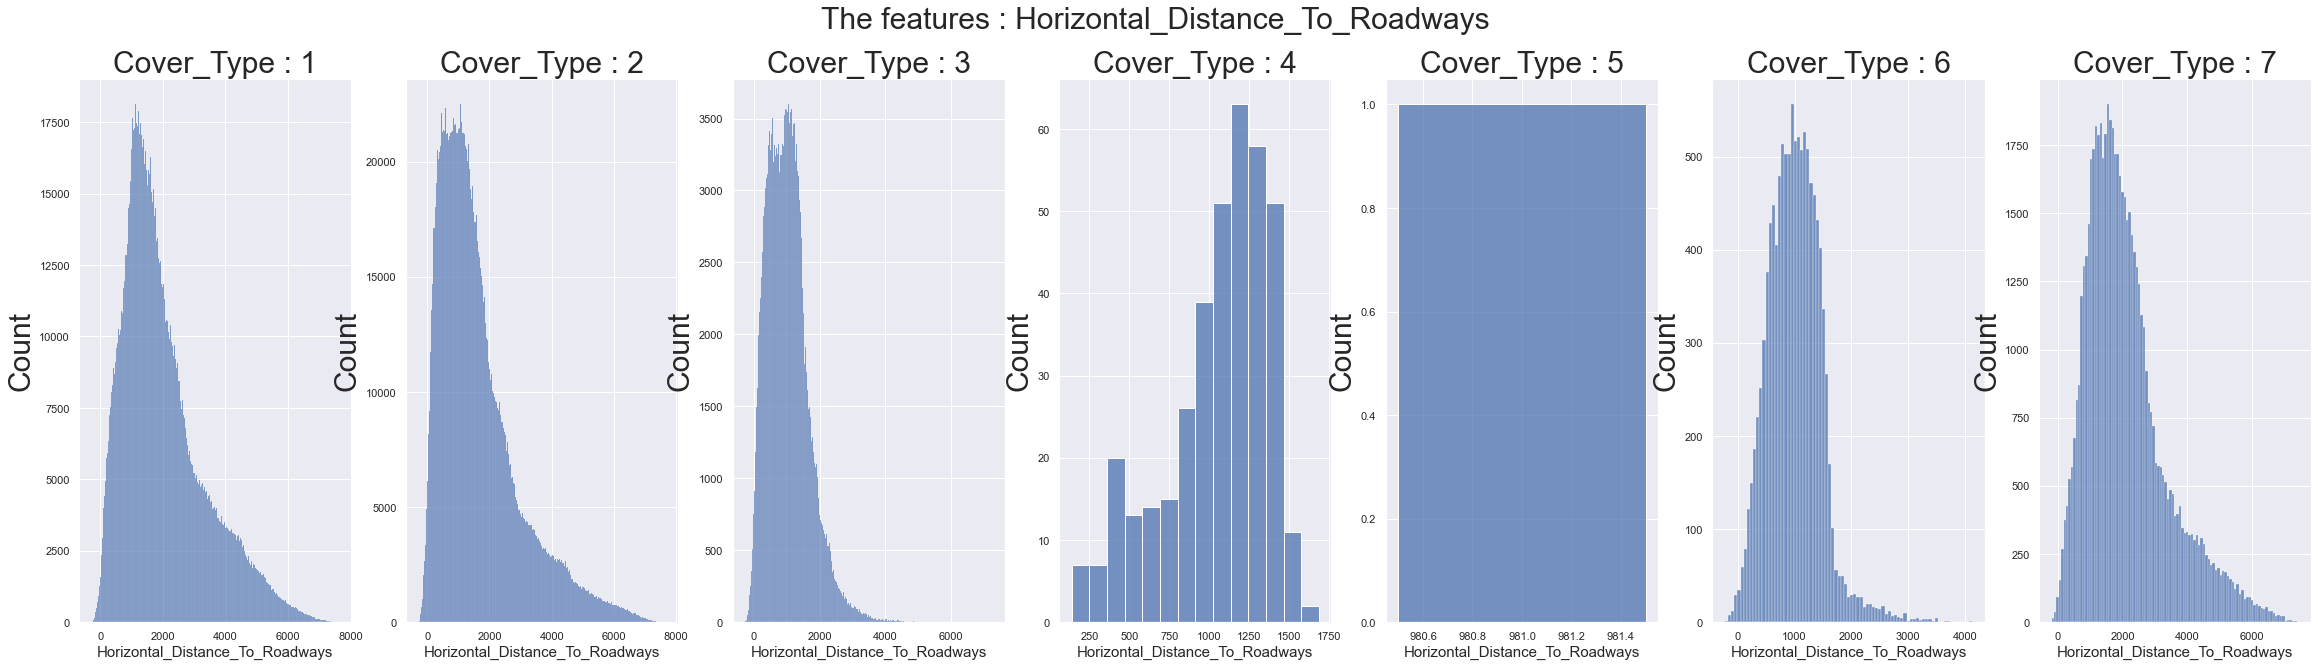

In [16]:
sns.set()
fig, axes = plt.subplots(1, 7, figsize=(40, 10))
fig.suptitle('The features : Horizontal_Distance_To_Roadways ', fontsize=30)
for i in range(7):
    Cover_type_cate = train_data[train_data['Cover_Type'] == (i+1)]
    sns.histplot(x =  Cover_type_cate.Horizontal_Distance_To_Roadways, ax = axes[i])
    axes[i].set_title(f'Cover_Type : {i+1}', fontsize=30)
    axes[i].set_xlabel('Horizontal_Distance_To_Roadways', fontsize=15)
    axes[i].set_ylabel('Count', fontsize=30)

### 3. Deep Learning Model

In [17]:
train_data = train_data.drop(columns = ['Count', 'Id'])
test_data = test_data.drop(columns = ['Id'])

In [18]:
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Count
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,0,0,0,1,1
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,0,0,0,2,1
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,0,0,0,1,1
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,0,0,0,2,1
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,0,0,0,2,1


In [19]:
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2763,78,20,377,88,3104,218,213,195,1931,...,0,0,0,0,0,0,0,0,0,0
1,2826,153,11,264,39,295,219,238,148,2557,...,0,0,0,0,0,0,0,0,0,0
2,2948,57,19,56,44,852,202,217,163,1803,...,0,0,1,0,0,0,0,0,0,0
3,2926,119,6,158,134,2136,234,240,142,857,...,0,0,0,0,0,0,0,0,0,0
4,2690,10,4,38,108,3589,213,221,229,431,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
data = train_data.drop(columns = 'Cover_Type')
target = train_data['Cover_Type']

Scale = MinMaxScaler()
data = Scale.fit_transform(data)
test_data = Scale.transform(test_data)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model, to_categorical
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size = 0.8, random_state = 10)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

c:\Users\steph\anaconda3\envs\ds_playground\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Count

  warnings.warn(message, FutureWarning)


ValueError: X has 54 features, but MinMaxScaler is expecting 55 features as input.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))
model.compile(optimizer= 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 30, validation_split = 0.2, batch_size = 512)

Epoch 1/30
5000/5000 [==============================] - 27s 5ms/step - loss: 0.2288 - accuracy: 0.9151 - val_loss: 0.1535 - val_accuracy: 0.9403
Epoch 2/30
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1450 - accuracy: 0.9424 - val_loss: 0.1332 - val_accuracy: 0.9462
Epoch 3/30
5000/5000 [==============================] - 27s 5ms/step - loss: 0.1324 - accuracy: 0.9463 - val_loss: 0.1267 - val_accuracy: 0.9484
Epoch 4/30
5000/5000 [==============================] - 28s 6ms/step - loss: 0.1250 - accuracy: 0.9490 - val_loss: 0.1216 - val_accuracy: 0.9501
Epoch 5/30
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1200 - accuracy: 0.9508 - val_loss: 0.1169 - val_accuracy: 0.9516
Epoch 6/30
5000/5000 [==============================] - 28s 6ms/step - loss: 0.1163 - accuracy: 0.9520 - val_loss: 0.1135 - val_accuracy: 0.9529
Epoch 7/30
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1133 - accuracy: 0.9529 - val_loss: 0.1110 - val_ac

KeyboardInterrupt: 

In [ ]:
df_DL = pd.DataFrame(history.history)
df_DL.head()

In [ ]:
plt.plot(df_DL.index, df_DL['loss'], label = 'loss')
plt.plot(df_DL.index, df_DL['val_loss'], label = 'Val_loss')
plt.xlabel( 'Epochs')
plt.ylabel('Binary_crossentropy')
plt.title('DL loss function')
plt.legend()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test = np.argmax(y_test, axis = 1)
y_pred = np.argmax(y_pred, axis = 1)

3-2. Comparsion between Reality and Prediction -> Confusion Matri

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (15, 15))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Submission

In [ ]:
submission = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv')
submission['Cover_Type'] = np.argmax(model.predict(test_data), axis = 1)
submission.to_csv('submission.csv', index=False)

In [ ]:
submission['Cover_Type'].unique()